## Лаборатоная работа

### Введение в Keras

Цели лабораторной работы: 
- разобраться с интерфейсом слоёв, участвующих в построении нейронной сети
- научиться обучать нейронные сети

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, MaxPooling1D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam
 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.3.1
1.15.0


#### Подготовка данных

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


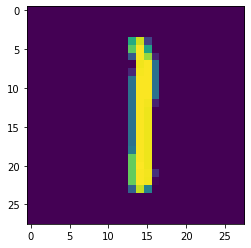

1.0 0.0 float32
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

index = 1238
plt.imshow(X_train[index,0, :,:])
plt.show()

print(np.max(X_train[index,0, :,:]), np.min(X_train[index,0, :,:]), np.dtype(np.max(X_train[index,0, :,:])))
print(Y_train[index])
print(np.argmax(Y_train[index]))

#### 1. (1 балл) Обучите простейшую однослойную нейронную сеть. Какой максимальный результат на тесте вам удалось достичь? Параметры обучения можно менять

[0.27712910251319406, 0.92330002784729]

In [0]:
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense2 = Dense(10, activation='softmax')(flatten)
model = Model(inputs=input_image, outputs=dense2)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=5)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=4, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 39000 samples, validate on 21000 samples
Epoch 1/10
39000/39000 [==============================] - 15s 388us/step - loss: 0.4840 - accuracy: 0.8704 - val_loss: 0.3586 - val_accuracy: 0.9007
Epoch 2/10
39000/39000 [==============================] - 17s 436us/step - loss: 0.3389 - accuracy: 0.9055 - val_loss: 0.3245 - val_accuracy: 0.9094
Epoch 3/10
39000/39000 [==============================] - 17s 430us/step - loss: 0.3145 - accuracy: 0.9109 - val_loss: 0.3155 - val_accuracy: 0.9121
Epoch 4/10
39000/39000 [==============================] - 16s 410us/step - loss: 0.3017 - accuracy: 0.9148 - val_loss: 0.3057 - val_accuracy: 0.9144
Epoch 5/10
39000/39000 [==============================] - 16s 411us/step - loss: 0.2933 - accuracy: 0.9170 - val_loss: 0.3038 - val_accuracy: 0.9143
Epoch 6/10
39000/39000 [==============================] - 16s 410us/step - loss: 0.2871 - accuracy: 0.9199 - val_loss: 0.3007 - val_accuracy: 0.9158
Epoch 7/10
39000/39000 [==============================] 

#### 2. (2 балла) Обучите двуслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

[0.06617859071135754, 0.9812999963760376]

In [0]:
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense1 = Dense(800, activation='relu')(flatten)
dense2 = Dense(10, activation='softmax')(dense1)
model = Model(inputs=input_image, outputs=dense2)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=5)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=4, epochs=25, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/25
39000/39000 [==============================] - 78s 2ms/step - loss: 0.3446 - accuracy: 0.9058 - val_loss: 0.2218 - val_accuracy: 0.9355
Epoch 2/25
39000/39000 [==============================] - 76s 2ms/step - loss: 0.1743 - accuracy: 0.9515 - val_loss: 0.1632 - val_accuracy: 0.9516
Epoch 3/25
39000/39000 [==============================] - 74s 2ms/step - loss: 0.1250 - accuracy: 0.9643 - val_loss: 0.1347 - val_accuracy: 0.9611
Epoch 4/25
39000/39000 [==============================] - 76s 2ms/step - loss: 0.0962 - accuracy: 0.9734 - val_loss: 0.1152 - val_accuracy: 0.9663
Epoch 5/25
39000/39000 [==============================] - 80s 2ms/step - loss: 0.0775 - accuracy: 0.9787 - val_loss: 0.1143 - val_accuracy: 0.9661
Epoch 6/25
39000/39000 [==============================] - 94s 2ms/step - loss: 0.0634 - accuracy: 0.9835 - val_loss: 0.0996 - val_accuracy: 0.9701
Epoch 7/25
39000/39000 [==============================] - 87s 2ms/st

#### 3. (2 балла) Обучите трёхслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

[0.0625563113745884, 0.9800999760627747]

In [0]:
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense1 = Dense(2000, activation='relu')(flatten)
dense2 = Dense(1500, activation='relu')(dense1)
dense3 = Dense(10, activation='softmax')(dense2)
model = Model(inputs=input_image, outputs=dense3)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=4, epochs=40, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/40
39000/39000 [==============================] - 326s 8ms/step - loss: 0.2955 - accuracy: 0.9153 - val_loss: 0.1620 - val_accuracy: 0.9527
Epoch 2/40
39000/39000 [==============================] - 313s 8ms/step - loss: 0.1213 - accuracy: 0.9645 - val_loss: 0.1313 - val_accuracy: 0.9600
Epoch 3/40
39000/39000 [==============================] - 322s 8ms/step - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.1081 - val_accuracy: 0.9662
Epoch 4/40
39000/39000 [==============================] - 329s 8ms/step - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.0902 - val_accuracy: 0.9724
Epoch 5/40
39000/39000 [==============================] - 329s 8ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 6/40
39000/39000 [==============================] - 309s 8ms/step - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.0878 - val_accuracy: 0.9737
Epoch 7/40
39000/39000 [==============================] - 312s

## 4. (3 балла) Улучшится ли ваш результат, есть в сеть добавить слои нормализации (dropout, batchnorm  и др.)?

[0.06598660109674093, 0.98089998960495]

In [0]:
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense1 = Dense(1600, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(800, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(10, activation='softmax')(norm2)
model = Model(inputs=input_image, outputs=dense3)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 34s 866us/step - loss: 0.3169 - accuracy: 0.9032 - val_loss: 0.1379 - val_accuracy: 0.9589
Epoch 2/30
39000/39000 [==============================] - 32s 810us/step - loss: 0.1481 - accuracy: 0.9554 - val_loss: 0.1072 - val_accuracy: 0.9678
Epoch 3/30
39000/39000 [==============================] - 33s 835us/step - loss: 0.1041 - accuracy: 0.9683 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 4/30
39000/39000 [==============================] - 32s 825us/step - loss: 0.0827 - accuracy: 0.9741 - val_loss: 0.0909 - val_accuracy: 0.9720
Epoch 5/30
39000/39000 [==============================] - 32s 817us/step - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0850 - val_accuracy: 0.9754
Epoch 6/30
39000/39000 [==============================] - 32s 831us/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 7/30
39000/39000 [==============================] 

#### 5. (4 баллов) Обучите полносвязную нейронную сеть (без свёрточных слоёв), достигающую лучшего качества на тесте без ограничений на количество слоёв?

[0.06803294677661907, 0.9825999736785889]

In [0]:
input_image = Input(shape=(1, 28, 28))
flatten = Flatten()(input_image)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 157s 4ms/step - loss: 0.2821 - accuracy: 0.9134 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 2/30
39000/39000 [==============================] - 139s 4ms/step - loss: 0.1240 - accuracy: 0.9606 - val_loss: 0.0933 - val_accuracy: 0.9720
Epoch 3/30
39000/39000 [==============================] - 139s 4ms/step - loss: 0.0874 - accuracy: 0.9712 - val_loss: 0.0869 - val_accuracy: 0.9745
Epoch 4/30
39000/39000 [==============================] - 141s 4ms/step - loss: 0.0661 - accuracy: 0.9783 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 5/30
39000/39000 [==============================] - 8377s 215ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 6/30
39000/39000 [==============================] - 152s 4ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0754 - val_accuracy: 0.9781
Epoch 7/30
39000/39000 [==============================] - 1

#### 6. (3 баллов) Обучите  нейронную сеть с  одним свёрточным слоем,  достигающую лучшего качества на тесте без ограничений на общее количество слоёв? Слой субдискретизации можно использовать в неограниченном количестве.

[0.031131103230834924, 0.9912999868392944]

In [0]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 641s 16ms/step - loss: 0.2268 - accuracy: 0.9286 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 2/30
39000/39000 [==============================] - 620s 16ms/step - loss: 0.0868 - accuracy: 0.9735 - val_loss: 0.0586 - val_accuracy: 0.9830
Epoch 3/30
39000/39000 [==============================] - 620s 16ms/step - loss: 0.0580 - accuracy: 0.9811 - val_loss: 0.0529 - val_accuracy: 0.9847
Epoch 4/30
39000/39000 [==============================] - 618s 16ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0494 - val_accuracy: 0.9858
Epoch 5/30
39000/39000 [==============================] - 619s 16ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 6/30
39000/39000 [==============================] - 622s 16ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0464 - val_accuracy: 0.9865
Epoch 7/30
39000/39000 [==============================] 

#### 7. (5 баллов) Обучите лучшую нейронную сеть следующими оптимизаторами: SGD, SGD + Momentum, SGD + NAG, AdaGrad, Adadelta, RMSprop, Adam. Какой оптимизатор позволяет достигнуть наибольшего качества на тесте? Какой оптимизатор сходится быстрее?

Лучшего качества на тесте позволяет достичь оптимизатор SGD. Быстрее всего сходится оптимизатор RMSprop и AdaGrad.

[0.031131103230834924, 0.9912999868392944] # SGD 

[0.03254392030218951, 0.9900000095367432] # SGD + Momentum

In [0]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_sgd = SGD(learning_rate=0.01, momentum=0.15, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 731s 19ms/step - loss: 0.2323 - accuracy: 0.9272 - val_loss: 0.0747 - val_accuracy: 0.9764
Epoch 2/30
39000/39000 [==============================] - 675s 17ms/step - loss: 0.0908 - accuracy: 0.9715 - val_loss: 0.0574 - val_accuracy: 0.9832
Epoch 3/30
39000/39000 [==============================] - 663s 17ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0475 - val_accuracy: 0.9862
Epoch 4/30
39000/39000 [==============================] - 689s 18ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 5/30
39000/39000 [==============================] - 671s 17ms/step - loss: 0.0275 - accuracy: 0.9906 - val_loss: 0.0446 - val_accuracy: 0.9864
Epoch 6/30
39000/39000 [==============================] - 675s 17ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0442 - val_accuracy: 0.9874
Epoch 7/30
39000/39000 [==============================] 

[0.03393979576454731, 0.9897000193595886] # SGD + NAG

In [3]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_sgd = SGD(learning_rate=0.01, momentum=0.0, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 23s 587us/step - loss: 0.2356 - accuracy: 0.9283 - val_loss: 0.0806 - val_accuracy: 0.9762
Epoch 2/30
39000/39000 [==============================] - 19s 487us/step - loss: 0.0890 - accuracy: 0.9722 - val_loss: 0.0624 - val_accuracy: 0.9802
Epoch 3/30
39000/39000 [==============================] - 19s 486us/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0550 - val_accuracy: 0.9843
Epoch 4/30
39000/39000 [==============================] - 19s 486us/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 5/30
39000/39000 [==============================] - 19s 485us/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0484 - val_accuracy: 0.9864
Epoch 6/30
39000/39000 [==============================] - 19s 486us/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0

[0.036020036213030106, 0.9900000095367432] # AdaGrad

In [4]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_ag = Adagrad(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt_ag, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 22s 558us/step - loss: 0.2191 - accuracy: 0.9439 - val_loss: 0.0561 - val_accuracy: 0.9827
Epoch 2/30
39000/39000 [==============================] - 21s 545us/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0454 - val_accuracy: 0.9860
Epoch 3/30
39000/39000 [==============================] - 21s 544us/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 4/30
39000/39000 [==============================] - 21s 544us/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 5/30
39000/39000 [==============================] - 21s 539us/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 6/30
39000/39000 [==============================] - 21s 542us/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0461 - val_accuracy: 0.9879
Epoch 7/30
39000/39000 [==============================] 

[0.03644836283873519, 0.9907000064849854] # Adadelta

In [5]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_ad = Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='categorical_crossentropy', optimizer=opt_ad, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 33s 840us/step - loss: 0.2664 - accuracy: 0.9288 - val_loss: 0.0870 - val_accuracy: 0.9762
Epoch 2/30
39000/39000 [==============================] - 32s 822us/step - loss: 0.0874 - accuracy: 0.9748 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 3/30
39000/39000 [==============================] - 32s 822us/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 4/30
39000/39000 [==============================] - 32s 823us/step - loss: 0.0434 - accuracy: 0.9873 - val_loss: 0.0782 - val_accuracy: 0.9814
Epoch 5/30
39000/39000 [==============================] - 32s 825us/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0519 - val_accuracy: 0.9868
Epoch 6/30
39000/39000 [==============================] - 32s 823us/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0522 - val_accuracy: 0.9870
Epoch 7/30
39000/39000 [==============================] 

[0.05149793492378667, 0.984000027179718] # RMSprop

In [8]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_rms = RMSprop(learning_rate=0.01, rho=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 25s 631us/step - loss: 0.5121 - accuracy: 0.8922 - val_loss: 0.1169 - val_accuracy: 0.9700
Epoch 2/30
39000/39000 [==============================] - 23s 601us/step - loss: 0.1390 - accuracy: 0.9629 - val_loss: 0.1496 - val_accuracy: 0.9650
Epoch 3/30
39000/39000 [==============================] - 23s 601us/step - loss: 0.1030 - accuracy: 0.9726 - val_loss: 0.0684 - val_accuracy: 0.9822
Epoch 4/30
39000/39000 [==============================] - 23s 598us/step - loss: 0.0896 - accuracy: 0.9770 - val_loss: 0.0766 - val_accuracy: 0.9814
Epoch 5/30
39000/39000 [==============================] - 23s 600us/step - loss: 0.0767 - accuracy: 0.9798 - val_loss: 0.1284 - val_accuracy: 0.9753
Epoch 6/30
39000/39000 [==============================] - 23s 601us/step - loss: 0.0641 - accuracy: 0.9827 - val_loss: 1.7905 - val_accuracy: 0.9792
Epoch 7/30
39000/39000 [==============================] 

[0.039240962877776474, 0.989799976348877] # Adam

In [7]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=100, kernel_size=(4, 4), activation='relu', data_format='channels_first')(input_image)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv1)
flatten = Flatten()(pool1)
dense1 = Dense(2500, activation='relu')(flatten)
drop1 = Dropout(0.25)(dense1)
norm1 = BatchNormalization()(drop1)
dense2 = Dense(2000, activation='relu')(norm1)
norm2 = BatchNormalization()(dense2)
dense3 = Dense(1500, activation='relu')(norm2)
norm3 = BatchNormalization()(dense3)
dense4 = Dense(1000, activation='relu')(norm3)
norm4 = BatchNormalization()(dense4)
dense5 = Dense(500, activation='relu')(norm4)
norm5 = BatchNormalization()(dense4)
dense6 = Dense(10, activation='softmax')(norm5)
model = Model(inputs=input_image, outputs=dense6)

opt_a = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=opt_a, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)
model.fit(X_train, Y_train, validation_split=0.35, callbacks=[es, rlr], batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 39000 samples, validate on 21000 samples
Epoch 1/30
39000/39000 [==============================] - 28s 712us/step - loss: 0.2582 - accuracy: 0.9287 - val_loss: 0.0981 - val_accuracy: 0.9725
Epoch 2/30
39000/39000 [==============================] - 27s 680us/step - loss: 0.1145 - accuracy: 0.9676 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 3/30
39000/39000 [==============================] - 26s 679us/step - loss: 0.0868 - accuracy: 0.9757 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 4/30
39000/39000 [==============================] - 27s 682us/step - loss: 0.0714 - accuracy: 0.9796 - val_loss: 0.0698 - val_accuracy: 0.9814
Epoch 5/30
39000/39000 [==============================] - 27s 682us/step - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0642 - val_accuracy: 0.9831
Epoch 6/30
39000/39000 [==============================] - 27s 683us/step - loss: 0.0476 - accuracy: 0.9864 - val_loss: 0.0832 - val_accuracy: 0.9798
Epoch 7/30
39000/39000 [==============================] 